# Generating Data

### Importing libraries to be used for data generation

In [ ]:
import numpy as np

import pandas as pd


### Defining variables and data structures used



In [ ]:
dataframe = pd.DataFrame()
pd.set_option('display.max_columns', None)
#Size of dataset
data_sample_size = 10000
customer_size = 1000
#Types of transaction
transaction_types = ["payment", "credit", "transfer"]


# min and max page(screen) counts of each payment type
# page count: the number of pages the customer visited while completing the transaction in the app. as the transaction differs, the number of pages also differs
menu_min_max_page_counts = {
    "payment": [5, 25],
    "credit": [10, 25],
    "transfer": [6, 25]
}

# min, max, std, mean
trans_types_and_limits = {
    "payment": [50, 30_000, 600, 1_000],
    "credit": [500, 200_000, 7_000, 50_000],
    "transfer": [200, 200_000, 50_000, 5_000]
}
# List of features to be created with normal distribution
normal_dist_features = [
        ["transaction_time",data_sample_size,120,120,15,300,True],
        ["customer_per_transaction_time_mean",data_sample_size,120,130,50,300,False], #####
        ["transaction_scroll_distance",data_sample_size,35,800,200,3600,True],
        ["customer_per_transaction_scroll_distance_mean",data_sample_size,35,800,200,3600,False],
        ["customer_per_transaction_click_mean",data_sample_size,40,35,10,200,False],####
        ["transaction_click",data_sample_size,40,35,10,200,True],
        ["app_leave_count",data_sample_size,2,2,0,20,True],
        ["transaction_screen_pressure_mean_per_page",data_sample_size,10,45,10,100,False],
        ["customer_screen_pressure_mean_per_page",data_sample_size,10,45,10,100,False],
        ["distance_from_last_transaction",data_sample_size,10,20,1,2000,True],
        ["new_old_balance_ratio_orig",data_sample_size,30,.5,0,.90,False],
        ["old_new_balance_ratio_dest",data_sample_size,30,.5,0,.90,False],
        ["total_income_per_year",data_sample_size,24000,204_000,24_000,3_600_000,True],
        ["dest_last_24h_transaction_count",data_sample_size,5,8,0,70,True]]

# List of features to be generated using the above variables
mean_features = [
    ["transaction_scroll_distance_mean", "transaction_scroll_distance"],
    ["customer_per_page_time_mean","customer_per_transaction_time_mean"],
    ["customer_per_page_scroll_distance_mean","customer_per_transaction_scroll_distance_mean"],
    ["transaction_click_mean", "transaction_click"]
    ]
app_types = ["web","mobile"]
device_types = ["desktop","mobile"]

# Education type list
edu_types = ["non_edu","primary_school","secondary_school","high_school","university"]
# from TUIK
edu_type_probabilities = np.array([3.5, 23.8, 19.4, 25.4, 27.9])

amount_segment_dict = {
    "low" : [500,5000],
    "mid-low" : [5000,10000],
    "mid" : [10000,50000],
    "mid-high" : [50000,100000],
    "high" : [100000,200000]
}
amount_segment_probabilities = np.array([39,35,12,12,2])

#From TUIK
customer_income_level = ["very-low","low","mid","high","very-high"]
customer_income_level_probabilities = np.array([23,32,18,21,6])


# Cutomer age
customer_ages_dict = {
      "18-25" : [18,25],
      "26-35" : [26,35],
      "36-55" : [36,55],
      "56-65" : [56,65],
      "65+" : [66,100]
}
#From TBB.org
cutomer_age_probabilites = np.array([23,26,38,9,4])


### Defining functions used for creating data

In [ ]:
# this function creates data in a range with a normal distribution
def create_data_with_normal_dist(size, std, mean, min, max, is_int = False):
  data = []
  while len(data) < size:
    x = np.random.normal(mean, std)
    if min <= x <= max:
      if is_int:
        x = int(x)
      data.append(x)
  return data

# this function create page count by transaction type between min and max
def produce_page_counts(transaction_type):
  return create_data_with_normal_dist(1, 6, menu_min_max_page_counts[transaction_type][0]+2, menu_min_max_page_counts[transaction_type][0], menu_min_max_page_counts[transaction_type][1],True)[0]


# this function calculates mean of given feature by related data
def calculate_means_of_features(row, transaction_feature, transaction_page_count):
  return row[transaction_feature] / row[transaction_page_count]

# this function returns app type web or mobile by given device_type
def decide_app_type(device_type):
    if device_type == 'desktop':
        return 'web'
    else:
        return np.random.choice(["mobile", "web"], size=1, p=[0.90, 0.10])[0]


def create_data_with_probabilty(size,probabilities,values):
  probabilities_dived_by_100 = probabilities / 100
  data = np.random.choice(values, size=size, p=probabilities_dived_by_100)
  return data

def create_data_with_probabilty_and_convert_to_number(size,probabilities,keys,is_segments_returns):
  probabilities_dived_by_100 = probabilities / 100
  data = np.random.choice(list(keys.keys()),size=size, p = probabilities_dived_by_100)
  data_result = []
  for i in data:
    data_result.append(np.random.randint(keys[i][0],keys[i][1],1)[0])
  if is_segments_returns:
    return data_result,data
  else:
    return data_result

def produce_customer_transaction_amount_mean_byTransType(transaction_type):
  return create_data_with_normal_dist(1, trans_types_and_limits[transaction_type][2], trans_types_and_limits[transaction_type][3], trans_types_and_limits[transaction_type][0], trans_types_and_limits[transaction_type][1],True)[0]

### Creating some of numeric normal distributed features, and page counts and transaction type which are random distributed

In [ ]:
for i in normal_dist_features:
  dataframe[i[0]] = create_data_with_normal_dist(i[1],i[2],i[3],i[4],i[5],i[6])

dataframe['transaction_type'] = [np.random.choice(transaction_types) for _ in range(data_sample_size)]

dataframe["transaction_page_count"] = dataframe["transaction_type"].apply(produce_page_counts)


### Creating some of numeric mean features

In [ ]:
dataframe["transaction_time_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("transaction_time", "transaction_page_count"))
dataframe["transaction_scroll_distance_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("transaction_scroll_distance", "transaction_page_count"))
dataframe["trasaction_per_page_click_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("transaction_click", "transaction_page_count"))
dataframe["customer_per_page_scroll_distance_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("customer_per_transaction_scroll_distance_mean", "transaction_page_count"))
dataframe["customer_per_page_time_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("customer_per_transaction_time_mean", "transaction_page_count"))
dataframe["customer_per_page_click_mean"] = dataframe.apply(calculate_means_of_features, axis=1, args=("customer_per_transaction_click_mean", "transaction_page_count"))
dataframe["customer_transaction_amount_mean"] =  dataframe["transaction_type"].apply(produce_customer_transaction_amount_mean_byTransType)


### Creating categorical features


In [ ]:
dataframe['onphone'] = np.random.choice([0, 1], size=data_sample_size, p=[0.80, 0.20])
dataframe['device_type'] = np.random.choice(device_types, size=data_sample_size, p=[0.80, 0.20])

In [ ]:
dataframe['application_type'] = dataframe['device_type'].apply(decide_app_type)

### Create Customer IDs
It is used for creating consistent customer data

In [ ]:
customer_orig_unique_ids = np.arange(0,customer_size)
customer_dest_unique_ids = np.arange(customer_size,2*customer_size)
dataframe["customer_orig_id"] = np.random.choice(customer_orig_unique_ids, size=data_sample_size)
dataframe["customer_dest_id"] = np.random.choice(customer_dest_unique_ids, size=data_sample_size)

In [ ]:
user_edu_types = create_data_with_probabilty(customer_orig_unique_ids.size,edu_type_probabilities, edu_types)
customer_education_level = dict(zip(customer_orig_unique_ids, user_edu_types))

dataframe["customer_education_level"] = dataframe["customer_orig_id"].map(customer_education_level)

### Create amount_type and transaction_amount

In [ ]:
transaction_amounts,amount_types = create_data_with_probabilty_and_convert_to_number(data_sample_size,amount_segment_probabilities,amount_segment_dict,True)
dataframe["amount_type"] = amount_types
dataframe["transaction_amount"] = transaction_amounts

### Create ratio_currTran_to_cust_mean_amount

In [ ]:
dataframe["ratio_currTran_to_cust_mean_amount"]  = dataframe["transaction_amount"] / dataframe["customer_transaction_amount_mean"]

### Create customer assets

In [ ]:
customer_income_levels = create_data_with_probabilty(customer_size,customer_income_level_probabilities,customer_income_level)
customer_orig_assets = dict(zip(customer_orig_unique_ids, customer_income_levels))
dataframe["customer_orig_assets"] = dataframe["customer_orig_id"].map(customer_orig_assets)

### Create customer ages

In [ ]:
customer_ages,customer_ages_categorical = create_data_with_probabilty_and_convert_to_number(customer_size,cutomer_age_probabilites,customer_ages_dict,True)
customer_age = dict(zip(customer_orig_unique_ids, customer_ages))
customer_age_categorical = dict(zip(customer_orig_unique_ids, customer_ages_categorical))
dataframe["customer_orig_age"] = dataframe["customer_orig_id"].map(customer_age)
dataframe["customer_age_categorical"] = dataframe["customer_orig_id"].map(customer_age_categorical)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

In [ ]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_time,10000.0,143.180600,74.289315,15.000000,82.000000,140.000000,200.000000,299.000000
customer_per_transaction_time_mean,10000.0,161.801620,66.422150,50.007025,106.387362,157.641436,213.348564,299.919137
transaction_scroll_distance,10000.0,799.684700,34.779590,669.000000,776.000000,799.000000,824.000000,936.000000
customer_per_transaction_scroll_distance_mean,10000.0,800.231841,35.230390,682.602969,776.191339,799.986324,824.262861,929.683157
customer_per_transaction_click_mean,10000.0,53.021132,28.827275,10.017858,30.184315,48.521411,71.004375,187.586697
transaction_click,10000.0,52.401600,28.620266,10.000000,30.000000,48.000000,70.000000,195.000000
app_leave_count,10000.0,2.081100,1.577838,0.000000,1.000000,2.000000,3.000000,9.000000
transaction_screen_pressure_mean_per_page,10000.0,45.085085,10.085682,10.327439,38.353818,45.021304,51.868312,88.835518
customer_screen_pressure_mean_per_page,10000.0,45.002534,9.941120,10.159317,38.366210,45.067650,51.628407,80.315886
distance_from_last_transaction,10000.0,20.205500,9.251293,1.000000,13.000000,20.000000,26.000000,57.000000


# Data Visualization

### importing libraries for data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

### Charts about customer personal informations

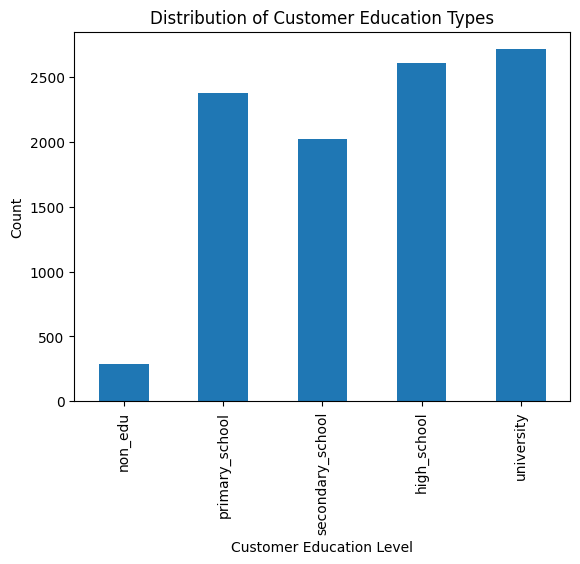

In [ ]:
dataframe["customer_education_level"].value_counts().loc[edu_types].plot(kind='bar')
plt.xlabel('Customer Education Level')
plt.ylabel('Count')
plt.title('Distribution of Customer Education Types')
plt.show()


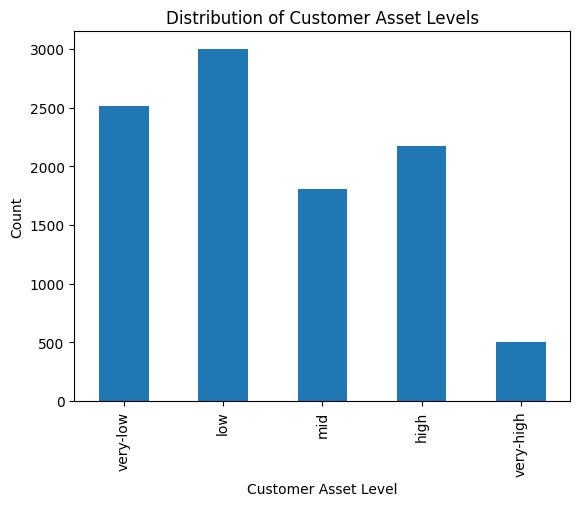

In [ ]:
dataframe["customer_orig_assets"].value_counts().loc[customer_income_level].plot(kind='bar')
plt.xlabel('Customer Asset Level')
plt.ylabel('Count')
plt.title('Distribution of Customer Asset Levels')
plt.show()


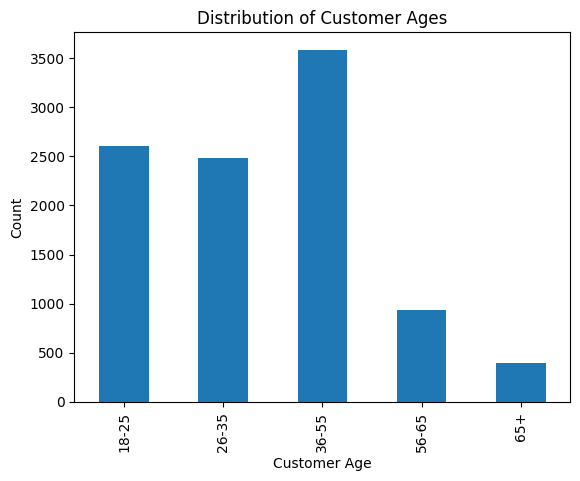

In [ ]:
age_order = list(customer_ages_dict.keys())
dataframe["customer_age_categorical"].value_counts().loc[age_order].plot(kind='bar')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()


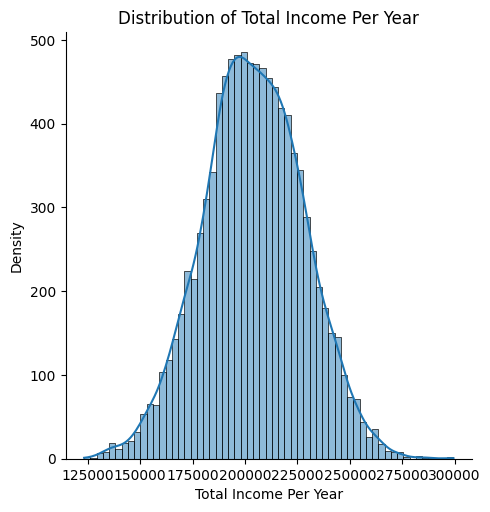

In [ ]:
sns.displot(dataframe['total_income_per_year'], kind='hist', kde=True)
plt.xlabel('Total Income Per Year')
plt.ylabel('Density')
plt.title('Distribution of Total Income Per Year')
plt.show()


### Charts about application types and usage

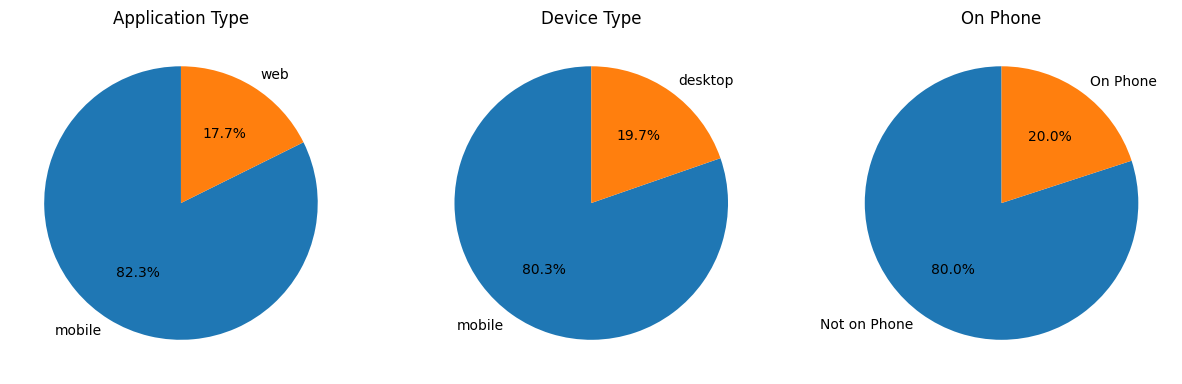

In [ ]:
app_type_counts = dataframe['application_type'].value_counts()
device_type_counts = dataframe['device_type'].value_counts()
onphone_counts = dataframe['onphone'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.pie(app_type_counts, labels=app_type_counts.index[::-1], autopct='%1.1f%%', startangle=90)
ax1.set_title('Application Type')

ax2.pie(device_type_counts, labels=device_type_counts.index[::-1], autopct='%1.1f%%', startangle=90)
ax2.set_title('Device Type')

ax3.pie(onphone_counts, labels=['Not on Phone', 'On Phone'], autopct='%1.1f%%', startangle=90)
ax3.set_title('On Phone')

plt.show()

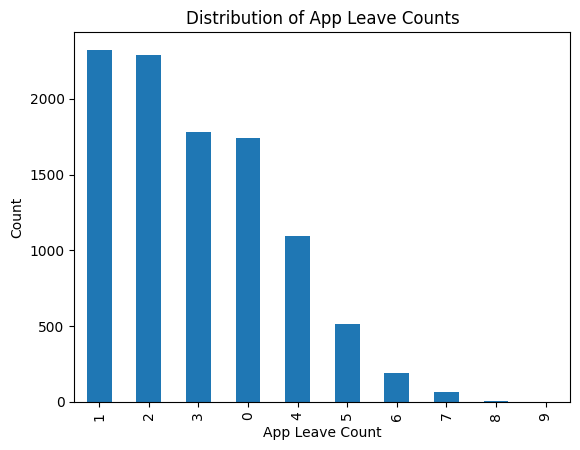

In [ ]:

dataframe['app_leave_count'].value_counts().plot(kind='bar')
plt.xlabel('App Leave Count')
plt.ylabel('Count')
plt.title('Distribution of App Leave Counts')
plt.show()


### Charts about transaction type and amount

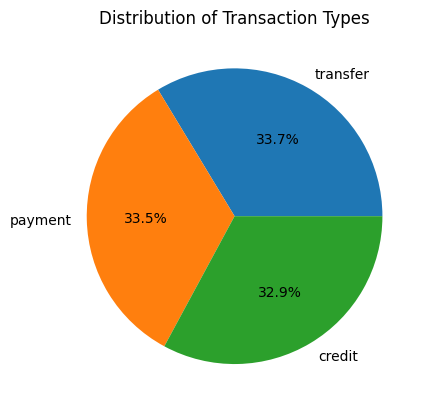

In [ ]:
dataframe['transaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.show()


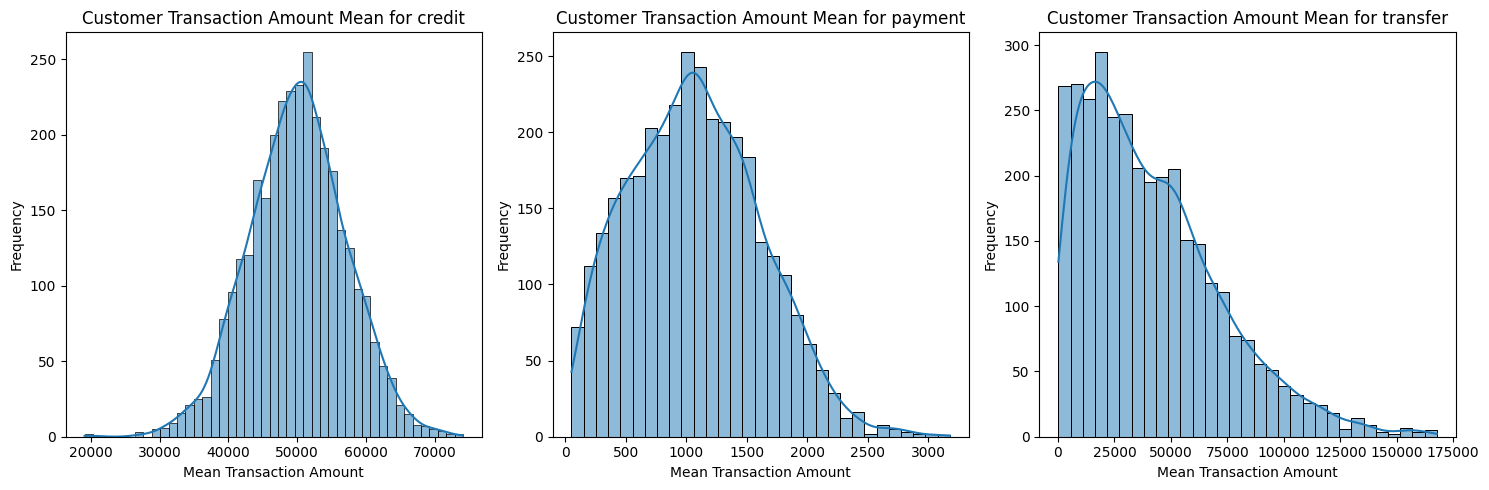

In [ ]:
fig, axes = plt.subplots(1, len(dataframe["transaction_type"].unique()), figsize=(15, 5))

for i, transaction_type in enumerate(dataframe["transaction_type"].unique()):
    sns.histplot(data=dataframe[dataframe['transaction_type'] == transaction_type], x='customer_transaction_amount_mean', kde=True, ax=axes[i])
    axes[i].set_title(f"Customer Transaction Amount Mean for {transaction_type}")
    axes[i].set_xlabel("Mean Transaction Amount")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

❌ NOT


####**Bu veri setinde age ve amount için kategorik değişkenler de var- yani önceki veri setinden 2 kolon fazla**




# Labeling Data

### Create isFraud feature

In [ ]:
dataframe["isFraud"] = np.zeros(data_sample_size)

In [ ]:
# senaryo 1
scenario_1_filtered = dataframe[
                        (dataframe['customer_orig_age'] > 52 ) & (dataframe['customer_orig_age'] < 60 ) &
                        (dataframe['transaction_type'] == "transfer" )
                        ]

part1 = int(len(scenario_1_filtered)/3)

for index, row in scenario_1_filtered.head(part1).iterrows():
    dataframe.at[index, "customer_transaction_amount_mean"] = np.random.randint(2_000, 3_000, 1)[0]
    dataframe.at[index, "transaction_amount"] = np.random.randint(14_000, 18_000, 1)[0]
    dataframe.at[index, "customer_per_transaction_time_mean"] = np.random.randint(85, 95, 1)[0]
    dataframe.at[index, "transaction_time"] = np.random.randint(35, 45, 1)[0]
    dataframe.at[index, "dest_last_24h_transaction_count"] = np.random.randint(10, 15, 1)[0]
    dataframe.at[index, "isFraud"] = int(1)
    dataframe.at[index, "senaryo"] = int(1)



In [ ]:
# senaryo 2
scenario_2_filtered = dataframe[
                        (dataframe['customer_screen_pressure_mean_per_page'] < dataframe['transaction_screen_pressure_mean_per_page'] ) &
                        (dataframe['transaction_type'] == "transfer" ) &
                        (dataframe['onphone'] == 1 )
                        ]

part2 = int(len(scenario_2_filtered) /4)

for index, row in scenario_2_filtered.head(part2).iterrows():
    dataframe.at[index, "customer_transaction_amount_mean"] = np.random.randint(10_000, 18_000, 1)[0]
    dataframe.at[index, "customer_per_transaction_click_mean"] = np.random.randint(15, 20, 1)[0]
    dataframe.at[index, "transaction_amount"] = np.random.randint(50_000, 70_000, 1)[0]
    dataframe.at[index, "transaction_click"] = np.random.randint(8, 12, 1)[0]
    dataframe.at[index, "new_old_balance_ratio_orig"] = np.random.uniform(0, 0.5, 1)[0]
    dataframe.at[index, "isFraud"] = int(1)
    dataframe.at[index, "senaryo"] = int(2)

In [ ]:
# senaryo 3
scenario_3_filtered = dataframe[
                        (dataframe['customer_screen_pressure_mean_per_page'] > dataframe['transaction_screen_pressure_mean_per_page'] ) &
                        (dataframe['customer_per_transaction_scroll_distance_mean'] < dataframe['transaction_scroll_distance'] ) &
                        (dataframe['transaction_type'] == "transfer" )
                        ]

part3 = int(len(scenario_3_filtered)/6)

for index, row in scenario_3_filtered.head(part3).iterrows():
    dataframe.at[index, "customer_transaction_amount_mean"] = np.random.randint(500, 1_500, 1)[0]
    dataframe.at[index, "transaction_amount"] = np.random.randint(500, 1_500, 1)[0]
    dataframe.at[index, "customer_per_transaction_time_mean"] = np.random.randint(15, 20, 1)[0]
    dataframe.at[index, "transaction_time"] = np.random.randint(80, 90, 1)[0]
    dataframe.at[index, "app_leave_count"] = np.random.randint(4, 8, 1)[0]
    dataframe.at[index, "new_old_balance_ratio_orig"] = np.random.uniform(0, 0.25, 1)[0]
    dataframe.at[index, "isFraud"] = int(1)
    dataframe.at[index, "senaryo"] = int(3)

In [ ]:
# senaryo 4
scenario_4_filtered = dataframe[
                        ((dataframe['transaction_amount'] / dataframe['customer_transaction_amount_mean'] < 1)
                        | (dataframe['customer_transaction_amount_mean'] / dataframe['transaction_amount'] < 1)) &
                        (dataframe['customer_per_transaction_scroll_distance_mean'] < dataframe['transaction_scroll_distance'] ) &
                        (dataframe['transaction_type'] == "transfer" ) &
                        (dataframe['customer_screen_pressure_mean_per_page'] < dataframe['transaction_screen_pressure_mean_per_page'])
                        ]

part4 = int(len(scenario_4_filtered) /3 )

for index, row in scenario_4_filtered.head(part4).iterrows():
    dataframe.at[index, "customer_per_transaction_click_mean"] = np.random.randint(10, 18, 1)[0]
    dataframe.at[index, "transaction_click"] = np.random.randint(8, 15, 1)[0]
    dataframe.at[index, "customer_per_transaction_time_mean"] = np.random.randint(20, 30, 1)[0]
    dataframe.at[index, "transaction_time"] = np.random.randint(15, 25, 1)[0]
    dataframe.at[index, "dest_last_24h_transaction_count"] = np.random.randint(5, 10, 1)[0]
    dataframe.at[index, "isFraud"] = int(1)
    dataframe.at[index, "senaryo"] = int(4)



In [ ]:
# senaryo 5
scenario_5_filtered = dataframe[
                        (dataframe['transaction_type'] == "credit" ) &
                        ((dataframe['transaction_amount'] / dataframe['customer_transaction_amount_mean'] < 1)
                        | (dataframe['customer_transaction_amount_mean'] / dataframe['transaction_amount'] < 1)) &
                        ((dataframe['customer_per_transaction_click_mean'] / dataframe['transaction_click'] < 1)
                        | (dataframe['transaction_click'] / dataframe['customer_per_transaction_click_mean'] < 1)) &
                        ((dataframe['customer_per_transaction_time_mean'] / dataframe['transaction_time'] < 1)
                        | (dataframe['transaction_time'] / dataframe['customer_per_transaction_time_mean'] < 1))
                        ]

part5 = int(len(scenario_5_filtered)/5)

for index, row in scenario_5_filtered.head(part5).iterrows():
    dataframe.at[index, "transaction_scroll_distance"] = np.random.randint(200, 1_800, 1)[0]
    dataframe.at[index, "customer_per_transaction_time_mean"] = dataframe.at[index, "transaction_scroll_distance"] * np.random.uniform(1.4, 2, 1)[0]
    dataframe.at[index, "isFraud"] = int(1)
    dataframe.at[index, "senaryo"] = int(5)




In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

In [ ]:
print(len(scenario_1_filtered))

print(len(scenario_2_filtered))

print(len(scenario_3_filtered))

print(len(scenario_4_filtered))

print(len(scenario_5_filtered))

dataframe[dataframe["isFraud"] == 1].shape[0]

249
334
853
803
3288


1157

# Encode Features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [ ]:
encoded_dataframe = dataframe.copy()


encoded_dataframe = encoded_dataframe.drop(columns=['customer_orig_id', 'customer_dest_id',"customer_age_categorical","senaryo"])

categorical_features = ['customer_orig_assets', 'amount_type', 'customer_education_level', 'application_type', 'device_type', 'transaction_type','customer_age_categorical']
numerical_features = [col for col in encoded_dataframe.columns if col not in categorical_features and col != 'isFraud' and col != 'senaryo']

In [ ]:

encoded_dataframe = pd.concat([encoded_dataframe, pd.get_dummies(encoded_dataframe['customer_education_level'], prefix='edu_type__', dtype=int)], axis=1)
encoded_dataframe = encoded_dataframe.drop('customer_education_level', axis=1)

encoded_dataframe = pd.concat([encoded_dataframe, pd.get_dummies(encoded_dataframe['application_type'], prefix='application_type__', dtype=int)], axis=1)
encoded_dataframe = encoded_dataframe.drop('application_type', axis=1)

encoded_dataframe = pd.concat([encoded_dataframe, pd.get_dummies(encoded_dataframe['device_type'], prefix='device_type__', dtype=int)], axis=1)
encoded_dataframe = encoded_dataframe.drop('device_type', axis=1)

encoded_dataframe = pd.concat([encoded_dataframe, pd.get_dummies(encoded_dataframe['transaction_type'], prefix='transaction_type__', dtype=int)], axis=1)
encoded_dataframe = encoded_dataframe.drop('transaction_type', axis=1)


le = LabelEncoder()
encoded_dataframe['customer_orig_assets'] = le.fit_transform(encoded_dataframe['customer_orig_assets'])
encoded_dataframe['amount_type'] = le.fit_transform(encoded_dataframe['amount_type'])

In [ ]:
# Ön işleme ve model pipeline'ı oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [ ]:
le = LabelEncoder()
dataframe['customer_orig_assets'] = le.fit_transform(dataframe['customer_orig_assets'])
dataframe['amount_type'] = le.fit_transform(dataframe['amount_type'])

X = dataframe.drop(columns=['isFraud'])
X = dataframe.drop(columns=['senaryo'])

X.info()
y = dataframe['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

# Models

### Random Forest

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['transaction_time',
                                                   'customer_per_transaction_time_mean',
                                                   'transaction_scroll_distance',
                                                   'customer_per_transaction_scroll_distance_mean',
                                                   'customer_per_transaction_click_mean',
                                                   'transaction_click',
                                                   'app_leave_count',
                                                   'transaction_screen_pressure_mean_per_page',
                                                   'custom...
                                                   'customer_transaction_amount_mean',
                                                   'onphone',
                                                   'transaction_amount',
                                                   'ratio_currTran_to_cust_mean_amount',
                                                   'customer_orig_age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer_orig_assets',
                                                   'amount_type',
                                                   'customer_education_level',
                                                   'application_type',
                                                   'device_type',
                                                   'transaction_type',
                                                   'customer_age_categorical'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred = model.predict(X_test)

# Model performansını değerlendirme
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

roc_auc, accuracy

(0.9853372434017595, 0.9966666666666667)

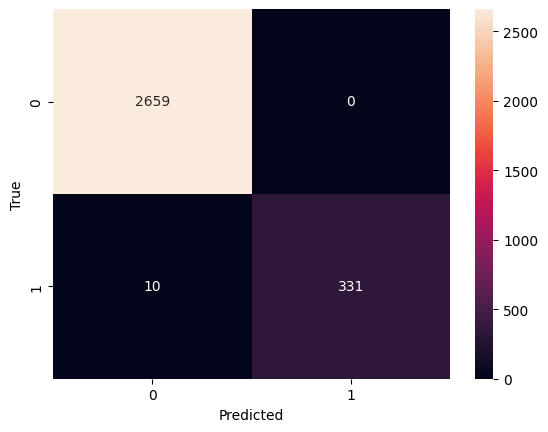

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.9985 0.998  0.9985 1.     0.9935]
Average cross-validation score: 0.9977


In [ ]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
f1, precision, recall

(0.9851190476190477, 1.0, 0.9706744868035191)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

In [ ]:
encoded_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   transaction_time                               10000 non-null  int64  
 1   customer_per_transaction_time_mean             10000 non-null  float64
 2   transaction_scroll_distance                    10000 non-null  int64  
 3   customer_per_transaction_scroll_distance_mean  10000 non-null  float64
 4   customer_per_transaction_click_mean            10000 non-null  float64
 5   transaction_click                              10000 non-null  int64  
 6   app_leave_count                                10000 non-null  int64  
 7   transaction_screen_pressure_mean_per_page      10000 non-null  float64
 8   customer_screen_pressure_mean_per_page         10000 non-null  float64
 9   distance_from_last_transaction                 1000

### Random Forest with Encoded Dataset

In [ ]:
model_encoded_random_forest = RandomForestClassifier()
X_encoded = encoded_dataframe.drop(columns=['isFraud'])
y_encoded = encoded_dataframe['isFraud']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=0)


model_encoded_random_forest.fit(X_train_enc, y_train_enc)

RandomForestClassifier()

In [ ]:
y_pred_enc = model_encoded_random_forest.predict(X_test_enc)

# Model performansını değerlendirme
roc_auc = roc_auc_score(y_test_enc, y_pred_enc)
accuracy = accuracy_score(y_test_enc, (y_pred_enc > 0.5).astype(int))

roc_auc, accuracy

(0.9882697947214076, 0.9973333333333333)

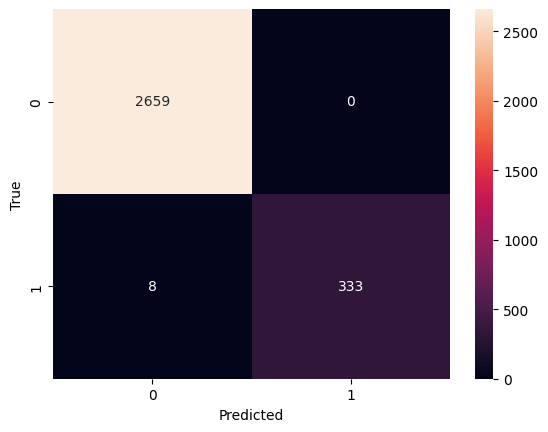

In [ ]:
cm_enc = confusion_matrix(y_test_enc, y_pred_enc)

sns.heatmap(cm_enc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
scores = cross_val_score(model_encoded_random_forest, X_encoded, y_encoded, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.999  0.9985 0.9985 0.9995 0.996 ]
Average cross-validation score: 0.9983000000000001


In [ ]:
f1 = f1_score(y_test_enc, y_pred_enc)
precision = precision_score(y_test_enc, y_pred_enc)
recall = recall_score(y_test_enc, y_pred_enc)

In [ ]:
f1, precision, recall

(0.9881305637982196, 1.0, 0.9765395894428153)